In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from scipy import stats
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
%matplotlib inline

 - https://en.wikipedia.org/wiki/Multivariate_normal_distribution
 - https://en.wikipedia.org/wiki/K-means_clustering
 - https://en.wikipedia.org/wiki/Voronoi_diagram
 - https://en.wikipedia.org/wiki/Mixture_model
 - https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html#scipy.stats.multivariate_normal
 - https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html
 - https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.spatial.Voronoi.html#scipy.spatial.Voronoi
 - https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
 - https://scikit-learn.org/stable/modules/mixture.html
 - https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
 - https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#sphx-glr-auto-examples-mixture-plot-gmm-pdf-py

### Data

In [2]:
np.random.seed(123456)

In [3]:
df = pd.DataFrame(columns=['x', 'y', 'set'])

In [4]:
X1 = pd.DataFrame(stats.multivariate_normal([0.5, 0], [[2.0, 0.3], [0.3, 0.5]]).rvs(1000), columns=['x', 'y'])
df = df.append(X1, sort=False).fillna(0)

In [5]:
X2 = pd.DataFrame(stats.multivariate_normal([-3, 3], [[3.0, 2], [2, 1.5]]).rvs(1000), columns=['x', 'y'])
df = df.append(X2, sort=False).fillna(1)

In [6]:
X3 = pd.DataFrame(stats.multivariate_normal([-2, -5], [[0.5, 0], [0, 0.5]]).rvs(1000), columns=['x', 'y'])
df = df.append(X3, sort=False).fillna(2)

In [7]:
df.reset_index(inplace=True, drop=True)
df['set'] = df['set'].astype(np.int64)

In [8]:
df.iloc[::200]

,x,y,set
0,-0.125225,-0.311968,0
200,-2.156987,-0.774607,0
400,2.703022,0.005840,0
600,0.460677,1.256244,0
800,-0.289663,0.311600,0
1000,-6.499940,0.717011,1
1200,-0.904637,4.338632,1
1400,-1.482938,4.341667,1
1600,-4.232988,1.506118,1
1800,-2.357895,3.734615,1


In [9]:
X = df.loc[:,['x','y']].values

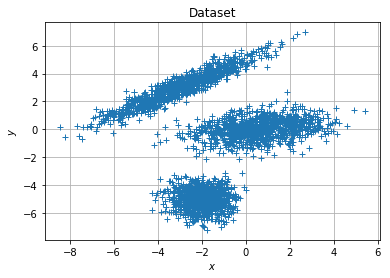

In [10]:
fig, axe = plt.subplots()
axe.plot(*X.T, '+')
axe.set_title("Dataset")
axe.set_xlabel("$x$")
axe.set_ylabel("$y$")
axe.grid()

### K-Means

In [11]:
clusters = KMeans(n_clusters=3, verbose=False).fit(X)
clusters

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)

In [12]:
df['KMeans'] = clusters.labels_
df.iloc[::500]

,x,y,set,KMeans
0,-0.125225,-0.311968,0,0
500,0.815491,0.019011,0,0
1000,-6.499940,0.717011,1,2
1500,0.617795,5.355625,1,2
2000,-0.600501,-6.530836,2,1
2500,-1.377865,-4.594342,2,1


In [13]:
vor = Voronoi(clusters.cluster_centers_)
g = df.groupby('KMeans')

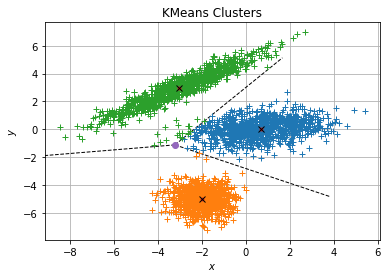

In [14]:
fig, axe = plt.subplots()
for group in g.groups:
    idx = g.groups[group]
    axe.plot(df.loc[idx,'x'], df.loc[idx,'y'], '+')
xlim, ylim = axe.get_xlim(), axe.get_ylim()
axe.ishold = lambda: True
voronoi_plot_2d(vor, axe)
axe.plot(*clusters.cluster_centers_.T, 'x', color='k')
axe.set_title("KMeans Clusters")
axe.set_xlabel("$x$")
axe.set_ylabel("$y$")
#axe.relim()
axe.set_xlim(xlim)
axe.set_ylim(ylim)
axe.grid()
fig.savefig("KMeans.png", dpi=120)

### Gaussian Mixture

> First one assumes random components (randomly centered on data points, learned from k-means, or even just normally distributed around the origin) and computes for each point a probability of being generated by each component of the model. Then, one tweaks the parameters to maximize the likelihood of the data given those assignments. Repeating this process is guaranteed to always converge to a local optimum.

In [15]:
clusters2 = BayesianGaussianMixture(n_components=3).fit(X)
clusters2

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=3, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [16]:
df['BGMix'] = clusters2.fit_predict(X)
df.iloc[::500]

,x,y,set,KMeans,BGMix
0,-0.125225,-0.311968,0,0,0
500,0.815491,0.019011,0,0,0
1000,-6.499940,0.717011,1,2,1
1500,0.617795,5.355625,1,2,1
2000,-0.600501,-6.530836,2,1,2
2500,-1.377865,-4.594342,2,1,2


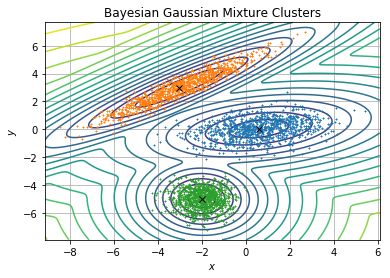

In [17]:
g = df.groupby('BGMix')
fig, axe = plt.subplots()
for group in g.groups:
    idx = g.groups[group]
    axe.plot(df.loc[idx,'x'], df.loc[idx,'y'], '+', markersize=2)
axe.plot(*clusters2.means_.T, 'x', color='k')
# Contours:
xlim, ylim = axe.get_xlim(), axe.get_ylim()
x_ = np.linspace(*xlim, 1000)
y_ = np.linspace(*ylim, 1000)
X_, Y_ = np.meshgrid(x_, y_)
XX_ = np.array([X_.ravel(), Y_.ravel()]).T
Z_ = -clusters2.score_samples(XX_)
Z_ = Z_.reshape(X_.shape)
CS = axe.contour(X_, Y_, Z_, norm=LogNorm(vmin=np.min(Z_), vmax=np.max(Z_)), levels=np.logspace(0, 2, 20))
axe.set_title("Bayesian Gaussian Mixture Clusters")
axe.set_xlabel("$x$")
axe.set_ylabel("$y$")
axe.grid()
fig.savefig("BGMix.png", dpi=120)

In [18]:
clusters2.score(X)

-3.594663033926392